In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram

First, we create 3 quantum and classical registers. Then we create a 'QuantumCircuit' object, and pass the created registers as arguments. And then we apply gates to various qubits.

In [2]:
# Creating registers
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

# Quantum circuit to make the shared entangled state 
teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1], tq[2])
teleport.iden(tq[1])
teleport.x(tq[2])  #this is the operator we are applying

Alice then prepares her 'unknown' quantum state to be teleported. This state is created by applying a rotation around the y axis. We use a rotation operator Ry.



In [3]:
teleport.ry(np.pi/4, tq[0]) 
#teleport.h(tq[0])

Alice now applies CNOT to her two quantum states, followed by an H, to entangle them and project them into the Bell basis:

In [4]:
teleport.cx(tq[0], tq[1])
teleport.h(tq[0])
teleport.barrier()

She now measures her two quantum states:

In [5]:
teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

Depending on the results of these measurements, Bob has to apply an X or Z, or both, to his quantum state:

In [6]:
teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

His state is now the same as the state Alice prepared earlier, which can be verified by measurement:

In [7]:
teleport.measure(tq[2], tc2[0])

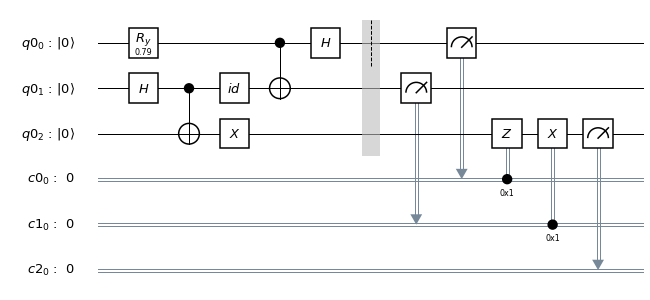

In [8]:
teleport.draw(output='mpl')

In [9]:
local_backend = BasicAer.get_backend('qasm_simulator') # note that this circuit can not be run on an IBM Q device
teleport_job = execute(teleport, local_backend) 
teleport_result = teleport_job.result()

We now extract data from the QuantumCircuit object. Each classical register here is seperated by a space, and the order is c2 c1 c0.

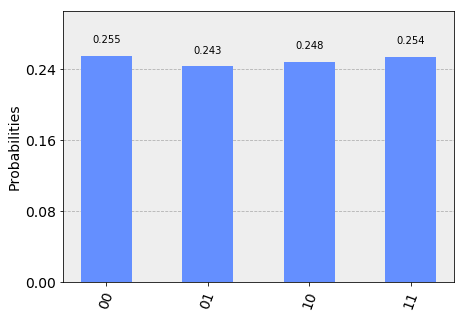

In [10]:
data = teleport_result.get_counts(teleport)
alice = {}
alice['00'] = data.get('0 0 0', 0) + data.get('1 0 0', 0)
alice['10'] = data.get('0 1 0', 0) + data.get('1 1 0', 0)
alice['01'] = data.get('0 0 1', 0) + data.get('1 0 1', 0)
alice['11'] = data.get('0 1 1', 0) + data.get('1 1 1', 0)
plot_histogram(alice)

And this is Bob's data:

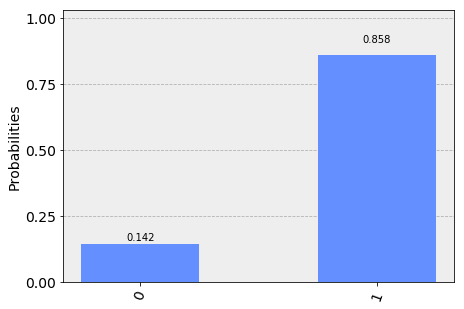

In [11]:
bob = {}
bob['0'] = data.get('0 0 0', 0) + data.get('0 1 0', 0) +  data.get('0 0 1', 0) + data.get('0 1 1', 0)
bob['1'] = data.get('1 0 0', 0) + data.get('1 1 0', 0) +  data.get('1 0 1', 0) + data.get('1 1 1', 0)
plot_histogram(bob)